In [1]:
# Dependencies
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
from scipy.stats import linregress

# Dependencies for GDP data
from pandas import ExcelWriter
from pandas import ExcelFile

In [2]:
# File to Load for Olympic Data
olympic_csv = "resources/athlete_events.csv"

# Read .csv File and store into Pandas data frame for Olympic Data
olympic_raw = pd.read_csv(olympic_csv)
pd.options.display.float_format = '{:.2f}'.format
olympic_raw.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.00,180.00,80.00,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.00,170.00,60.00,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.00,nan,nan,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.00,nan,nan,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.00,185.00,82.00,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
# Load and read .xls file for GDP data
gdp_data = pd.read_excel("Country GDP Final.xls")

In [4]:
# Review and format GDP numbers

#pd.options.display.float_format = '${:,.2f}'.format
gdp_data.head()

,NOC,NOC Region,2000,2001,2002,2003,2004,2005,2006,2007,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,AFG,Afghanistan,nan,nan,4055176933.37,4515563413.83,5226775163.30,6209140044.01,6971286731.72,9747886104.53,...,12439087076.77,15856574731.44,17804280538.11,20001615788.67,20561054090.40,20484873230.21,19907111418.99,19362642266.65,20191764940.16,19362969582.36
1,ALB,Albania,3480355188.60,3922099470.97,4348070165.19,5611492282.87,7184681398.57,8052075642.11,8896073938.31,10677321490.38,...,12044223457.83,11926962834.96,12890867535.56,12319784701.33,12776277648.92,13228244336.32,11386927679.09,11861353752.07,13025064966.58,15102500898.24
2,ALG,Algeria,54786074940.21,54743249368.65,56758113501.17,67866141223.59,85324767230.49,103198442061.08,117030941571.94,134978727825.85,...,137214821177.36,161205065469.31,200015355528.47,209062886917.04,209754763860.68,213808808746.70,165978425168.39,160032930353.76,167390266100.76,173757952824.25
3,AND,Andorra,1434429703.34,1496912751.68,1733116883.12,2398645598.19,2935659299.73,3255789080.96,3543256805.92,4016972351.49,...,3660530702.97,3355695364.24,3442062830.14,3164615186.95,3281585236.33,3350736367.25,2811489408.89,2877311946.90,3013387423.94,3236543909.35
4,ANG,Angola,9129594818.61,8936063723.20,15285594828.42,17812705294.33,23552052407.55,36970918699.25,52381006892.04,65266452081.39,...,70307163678.24,83799496611.20,111789686464.44,128052853643.11,136709862831.19,145712200312.51,116193649124.15,101123851090.46,122123822333.59,105750987618.63


In [5]:
# remove all rows of data for Olympics taking place before the end of WW2 (1945).
olympic_raw_post_war = olympic_raw[olympic_raw.Year > 1945]

# this is our raw dataframe for post ward data.
#olympic_raw_post_war.head()

# split dataframe into two separate dataframes by summer and winter games
# this is our dataframe for summer olympic data, post WW2.
summer_olympics = olympic_raw_post_war[olympic_raw_post_war.Season != "Winter"]
summer_olympics.head()
# this is our dataframe for winter olympic data, post WW2.
#winter_olympics = olympic_raw_post_war[olympic_raw_post_war.Season != "Summer"]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.00,180.00,80.00,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.00,170.00,60.00,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
29,10,"Einar Ferdinand ""Einari"" Aalto",M,26.00,nan,nan,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Swimming,Swimming Men's 400 metres Freestyle,NaN
31,12,Jyri Tapani Aalto,M,31.00,172.00,70.00,Finland,FIN,2000 Summer,2000,Summer,Sydney,Badminton,Badminton Men's Singles,NaN
32,13,Minna Maarit Aalto,F,30.00,159.00,55.50,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,NaN


The Pearson's correlation between 2016 GDP and total medal count is: 0.866557


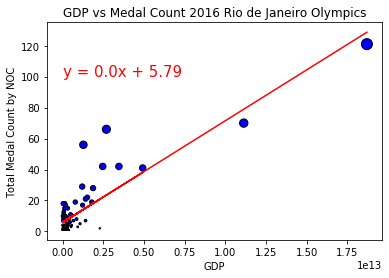

In [78]:
# GDP and medal count analysis on 2016 Olympics
olympics_2016 = summer_olympics.loc[summer_olympics.Year == 2016]
olympics_2016.shape

# Drop rows where Medal is NaN
no_null_olympics_2016 = olympics_2016.dropna(how='any')
no_null_olympics_2016.tail()

# Dropping duplicate medals for team events
final_result = no_null_olympics_2016.drop_duplicates(subset=['Event', 'NOC', 'Medal'])
final_result.shape

# Grouping by NOC countries and calculating total medals won by country
medal_count_by_NOC_2016 = final_result.NOC.value_counts().to_frame(name = "Medal_Count").reset_index()
final_medal_count_by_NOC_2016 = medal_count_by_NOC_2016.rename(columns={"index": "NOC"})
final_medal_count_by_NOC_2016.shape

# Creating a dataframe for just 2016 GDP data
gdp_NOC_2016 = gdp_data.loc[: , ["NOC", "2016"]]
gdp_NOC_2016.head()

# Merge the medal count by NOC and GDP dataframes
merge_2016 = pd.merge(final_medal_count_by_NOC_2016, gdp_NOC_2016, on="NOC", how="left")
merge_2016["Reformatted"] = (merge_2016["2016"]/1000000000).apply(lambda x: "${:,.2f}BB".format(x))
clean_merge_2016 = merge_2016.dropna(how="any")
clean_merge_2016.shape

# Scatter plot of medal count and gdp for 2016 Olympic medal winners to see 
# if there is a correlation between GDP and medal count.  Also adding linear regression
medal_count = clean_merge_2016["Medal_Count"]
gdp = clean_merge_2016["2016"]

x_values = gdp
y_values = medal_count
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values , y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values,  marker="o", facecolors="blue", edgecolor="black", s=medal_count)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (1, 100), fontsize=15, color="red")
plt.title("GDP vs Medal Count 2016 Rio de Janeiro Olympics")
plt.xlabel("GDP")
plt.ylabel("Total Medal Count by NOC")

print(f"The Pearson's correlation between 2016 GDP and total medal count is: {round(rvalue, 6)}")


The Pearson's correlation between 2012 GDP and total medal count is: 0.835764


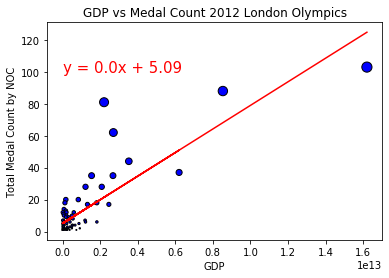

In [75]:
# GDP and medal count analysis on 2012 Olympics
olympics_2012 = summer_olympics.loc[summer_olympics.Year == 2012]

# # Drop rows where Medal is NaN
no_null_olympics_2012 = olympics_2012.dropna(how='any')

# # Dropping duplicate medals for team events
final_result = no_null_olympics_2012.drop_duplicates(subset=['Event', 'NOC', 'Medal'])

# Grouping by NOC countries and calculating total medals won by country
medal_count_by_NOC_2012 = final_result.NOC.value_counts().to_frame(name = "Medal_Count").reset_index()
final_medal_count_by_NOC_2012 = medal_count_by_NOC_2012.rename(columns={"index": "NOC"})

# Creating a dataframe for just 2012 GDP data
gdp_NOC_2012 = gdp_data.loc[: , ["NOC", "2012"]]

# Merge the medal count by NOC and GDP dataframes
merge_2012 = pd.merge(final_medal_count_by_NOC_2012, gdp_NOC_2012, on="NOC", how="left")
merge_2012["Reformatted"] = (merge_2012["2012"]/1000000000).apply(lambda x: "${:,.2f}BB".format(x))
clean_merge_2012 = merge_2012.dropna(how="any")

# Scatter plot of medal count and gdp for 2012 Olympic medal winners to see 
# if there is a correlation between GDP and medal count.  Also adding linear regression
medal_count = clean_merge_2012["Medal_Count"]
gdp = clean_merge_2012["2012"]

x_values = gdp
y_values = medal_count
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values , y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values,  marker="o", facecolors="blue", edgecolor="black", s=medal_count)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (1, 100), fontsize=15, color="red")
plt.title("GDP vs Medal Count 2012 London Olympics")
plt.xlabel("GDP")
plt.ylabel("Total Medal Count by NOC")

print(f"The Pearson's correlation between 2012 GDP and total medal count is: {round(rvalue, 6)}")


The Pearson's correlation between 2008 GDP and total medal count is: 0.806584


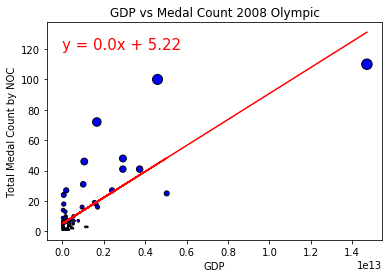

In [71]:
# GDP and medal count analysis on 2008 Olympics
olympics_2008 = summer_olympics.loc[summer_olympics.Year == 2008]

# # Drop rows where Medal is NaN
no_null_olympics_2008 = olympics_2008.dropna(how='any')

# # Dropping duplicate medals for team events
final_result = no_null_olympics_2008.drop_duplicates(subset=['Event', 'NOC', 'Medal'])

# Grouping by NOC countries and calculating total medals won by country
medal_count_by_NOC_2008 = final_result.NOC.value_counts().to_frame(name = "Medal_Count").reset_index()
final_medal_count_by_NOC_2008 = medal_count_by_NOC_2008.rename(columns={"index": "NOC"})

# Creating a dataframe for just 2008 GDP data
gdp_NOC_2008 = gdp_data.loc[: , ["NOC", "2008"]]

# Merge the medal count by NOC and GDP dataframes
merge_2008 = pd.merge(final_medal_count_by_NOC_2008, gdp_NOC_2008, on="NOC", how="left")
merge_2008["Reformatted"] = (merge_2008["2008"]/1000000000).apply(lambda x: "${:,.2f}BB".format(x))
clean_merge_2008 = merge_2008.dropna(how="any")

# Scatter plot of medal count and gdp for 2008 Olympic medal winners to see 
# if there is a correlation between GDP and medal count.  Also adding linear regression
medal_count = clean_merge_2008["Medal_Count"]
gdp = clean_merge_2008["2008"]

x_values = gdp
y_values = medal_count
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values , y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values,  marker="o", facecolors="blue", edgecolor="black", s=medal_count)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (1, 120), fontsize=15, color="red")
plt.title("GDP vs Medal Count 2008 Beijing Olympics")
plt.xlabel("GDP")
plt.ylabel("Total Medal Count by NOC")

print(f"The Pearson's correlation between 2008 GDP and total medal count is: {round(rvalue, 6)}")


The Pearson's correlation between 2004 GDP and total medal count is: 0.721747


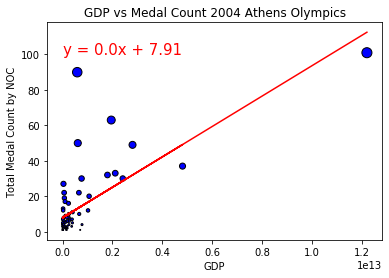

In [89]:
# GDP and medal count analysis on 2004 Olympics
olympics_2004 = summer_olympics.loc[summer_olympics.Year == 2004]

# # Drop rows where Medal is NaN
no_null_olympics_2004 = olympics_2004.dropna(how='any')

# # Dropping duplicate medals for team events
final_result = no_null_olympics_2004.drop_duplicates(subset=['Event', 'NOC', 'Medal'])

# Grouping by NOC countries and calculating total medals won by country
medal_count_by_NOC_2004 = final_result.NOC.value_counts().to_frame(name = "Medal_Count").reset_index()
final_medal_count_by_NOC_2004 = medal_count_by_NOC_2004.rename(columns={"index": "NOC"})

# Creating a dataframe for just 2004 GDP data
gdp_NOC_2004 = gdp_data.loc[: , ["NOC", "2004"]]

# Merge the medal count by NOC and GDP dataframes
merge_2004 = pd.merge(final_medal_count_by_NOC_2004, gdp_NOC_2004, on="NOC", how="left")
merge_2004["Reformatted"] = (merge_2004["2004"]/1000000000).apply(lambda x: "${:,.2f}BB".format(x))
clean_merge_2004 = merge_2004.dropna(how="any")

# Scatter plot of medal count and gdp for 2004 Olympic medal winners to see 
# if there is a correlation between GDP and medal count.  Also adding linear regression
medal_count = clean_merge_2004["Medal_Count"]
gdp = clean_merge_2004["2004"]

x_values = gdp
y_values = medal_count
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values , y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values,  marker="o", facecolors="blue", edgecolor="black", s=medal_count)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (1, 100), fontsize=15, color="red")
plt.title("GDP vs Medal Count 2004 Athens Olympics")
plt.xlabel("GDP")
plt.ylabel("Total Medal Count by NOC")

print(f"The Pearson's correlation between 2004 GDP and total medal count is: {round(rvalue, 6)}")

 
The Pearson's correlation between 2004 GDP and total medal count is: 0.603137


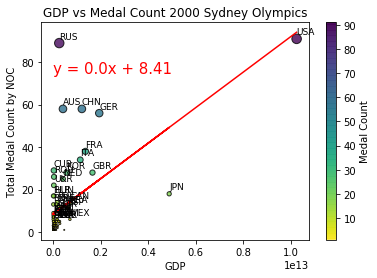

In [118]:
# GDP and medal count analysis on 2000 Olympics
olympics_2000 = summer_olympics.loc[summer_olympics.Year == 2000]

# # Drop rows where Medal is NaN
no_null_olympics_2000 = olympics_2000.dropna(how='any')

# # Dropping duplicate medals for team events
final_result = no_null_olympics_2000.drop_duplicates(subset=['Event', 'NOC', 'Medal'])

# Grouping by NOC countries and calculating total medals won by country
medal_count_by_NOC_2000 = final_result.NOC.value_counts().to_frame(name = "Medal_Count").reset_index()
final_medal_count_by_NOC_2000 = medal_count_by_NOC_2000.rename(columns={"index": "NOC"})

# Creating a dataframe for just 2000 GDP data
gdp_NOC_2000 = gdp_data.loc[: , ["NOC", "2000"]]

# Merge the medal count by NOC and GDP dataframes
merge_2000 = pd.merge(final_medal_count_by_NOC_2000, gdp_NOC_2000, on="NOC", how="left")
merge_2000["Reformatted"] = (merge_2000["2000"]/1000000000).apply(lambda x: "${:,.2f}BB".format(x))
clean_merge_2000 = merge_2000.dropna(how="any")

# Scatter plot of medal count and gdp for 2000 Olympic medal winners to see 
# if there is a correlation between GDP and medal count.  Also adding linear regression
medal_count = clean_merge_2000["Medal_Count"]
gdp = clean_merge_2000["2000"]

# Calculate regression line
x_values = gdp
y_values = medal_count
noc_types = clean_merge_2000["NOC"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values , y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatterplot, colormap
c = clean_merge_2000["Medal_Count"]
plt.scatter(x_values, y_values,  marker="o", facecolors="blue", edgecolor="black", s=medal_count,
           c=c, cmap = 'viridis_r', alpha=0.8)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (1, 75), fontsize=15, color="red")
cbar = plt.colorbar()
cbar.set_label('Medal Count')
plt.title("GDP vs Medal Count 2000 Sydney Olympics")
plt.xlabel("GDP")
plt.ylabel("Total Medal Count by NOC")

# Add labels
try:
    for i,type in enumerate(noc_types):
        x = x_values[i]
        y = y_values[i]
        plt.text(x+1, y+2, type, fontsize=9)
except (KeyError):
    print(" ")
    
print(f"The Pearson's correlation between 2004 GDP and total medal count is: {round(rvalue, 6)}")
